In [3]:
import tensorflow as tf
import numpy as np
import random

import matplotlib.pyplot as plt

In [0]:
def gen_synthetic_data(n, start, end, a_i):
  x = [start + (end-start)*random.random() for i in range(n)]
  y = [sum([a*pow(_x,i) for i, a in enumerate(reversed(a_i))]) for _x in x]

  x,y = zip(*sorted(zip(x,y), key=lambda x : x[0]))

  return x,y


In [0]:
seq_len = 32
pred_len = 16
total_samples = 300
data = np.array([list(zip(*gen_synthetic_data(seq_len+pred_len, -3,3, [1,1,-5,0.0]))) for i in range(total_samples)])

In [0]:
x_data = np.array([s[:seq_len] for s in data]) 
y_data = np.array([s[seq_len:] for s in data])
y_data_shift = np.roll(y_data, -1, axis = 0)

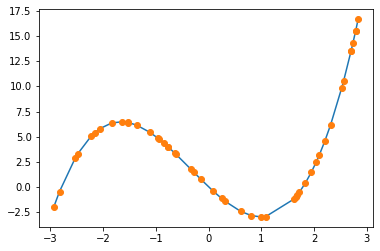

In [16]:
x_plt, y_plt = zip(*data[50])
plt.plot(x_plt,y_plt)
plt.plot(x_plt, y_plt, 'o')
plt.show()

In [0]:
input_layer = tf.keras.layers.Input(shape=(seq_len,2))
rnn_encoder_layer_1 = tf.keras.layers.SimpleRNN(256,return_state=True)
rnn_encode_output, rnn_encode_state = rnn_encoder_layer_1(input_layer)

decode_input_layer = tf.keras.layers.Input(shape=(pred_len,2))
rnn_decode_layer_1 = tf.keras.layers.SimpleRNN(256, return_state=True, return_sequences=True)
rnn_decode_outputs, _ = rnn_decode_layer_1(decode_input_layer, initial_state = rnn_encode_state)
dense_out = tf.keras.layers.Dense(2)(rnn_decode_outputs)

model = tf.keras.Model([input_layer, decode_input_layer], dense_out)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[])

In [31]:
model.fit([x_data, y_data], y_data_shift, epochs = 500, batch_size=2)

Train on 300 samples
Epoch 1/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.9583
Epoch 2/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.9211
Epoch 3/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.9326
Epoch 4/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.9204
Epoch 5/500
300/300 [==============================] - 2s 5ms/sample - loss: 0.9311
Epoch 6/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.9139
Epoch 7/500
300/300 [==============================] - 2s 5ms/sample - loss: 0.9040
Epoch 8/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.8998
Epoch 9/500
300/300 [==============================] - 2s 5ms/sample - loss: 0.8941
Epoch 10/500
300/300 [==============================] - 2s 6ms/sample - loss: 0.8965
Epoch 11/500
300/300 [==============================] - 2s 5ms/sample - loss: 0.8846
Epoch 12/500
300/300 [==============================]

In [0]:
y_pred = np.zeros_like(y_data)

for i in range(pred_len):
    _p = model.predict([x_data, y_pred])
    for _p_dest, _p_src in zip(y_pred, _p):
        _p_dest[i] = _p_src[i]

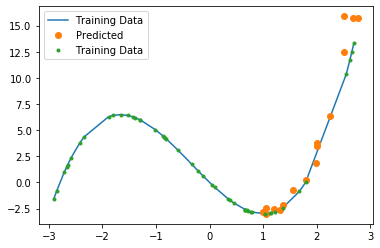

In [33]:
x_plt_data, y_plt_data = zip(*data[10])
x_plt_pred, y_plt_pred = zip(*y_pred[10])
plt.plot(x_plt_data, y_plt_data, label="Training Data")
plt.plot(x_plt_pred, y_plt_pred,'o', label="Predicted")
plt.plot(x_plt_data, y_plt_data,'.', label="Training Data")
plt.legend()
plt.show()